In [9]:
#Avec Numpy et Pandas:
#1
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv('appartements.csv')

# Calculer les statistiques sur la surface
surface_moyenne = df['surface'].mean()
surface_ecart_type = df['surface'].std()
surface_min = df['surface'].min()
surface_max = df['surface'].max()

# Afficher les résultats
print(f"Surface moyenne : {surface_moyenne:.2f} m²")
print(f"Écart-type de la surface : {surface_ecart_type:.2f} m²")
print(f"Surface minimale : {surface_min} m²")
print(f"Surface maximale : {surface_max} m²")


Surface moyenne : 69.59 m²
Écart-type de la surface : 35.44 m²
Surface minimale : 20 m²
Surface maximale : 160 m²


In [2]:
#2
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv('appartements.csv')

# Calculer les statistiques sur l'année de construction
annee_moyenne = df['annee'].mean()
annee_plus_ancienne = df['annee'].min()
annee_plus_recente = df['annee'].max()

# Afficher les résultats
print(f"Année moyenne de construction : {annee_moyenne:.2f}")
print(f"Construction la plus ancienne : {annee_plus_ancienne}")
print(f"Construction la plus récente : {annee_plus_recente}")


Année moyenne de construction : 2018.35
Construction la plus ancienne : 2010
Construction la plus récente : 2024


In [4]:
#3
import numpy as np
import pandas as pd

# Lire le fichier CSV avec Pandas
df = pd.read_csv('appartements.csv')

# Convertir la colonne 'balcon' en tableau Numpy (True/False)
balcon = np.array(df['balcon'])

# Calculer la proportion d'appartements avec un balcon
proportion_balcon = np.mean(balcon) * 100

# Afficher le résultat
print(f"Proportion d'appartements avec un balcon : {proportion_balcon:.2f}%")


Proportion d'appartements avec un balcon : 63.04%


In [8]:
#4
import numpy as np
import pandas as pd

# Lire le fichier CSV avec Pandas
df = pd.read_csv('appartements.csv')

# Convertir la colonne 'price_category' en tableau Numpy
prix_categories = np.array(df['price_category'])

# Compter le nombre d'appartements dans chaque catégorie
unique, counts = np.unique(prix_categories, return_counts=True)

# Créer un dictionnaire pour les résultats
count_dict = dict(zip(unique, counts))
# affficher le nombre total

# Afficher les résultats
for category, count in count_dict.items():
    print(f"Nombre d'appartements dans la catégorie '{category}' : {count}")


Nombre d'appartements dans la catégorie 'high' : 22
Nombre d'appartements dans la catégorie 'low' : 12
Nombre d'appartements dans la catégorie 'normal' : 12


In [9]:
#5
import numpy as np
import pandas as pd

# Lire le fichier CSV avec Pandas
df = pd.read_csv('appartements.csv')

# Convertir la colonne 'nbRooms' en tableau Numpy
nb_rooms = np.array(df['nbRooms'])

# Calculer les statistiques sur le nombre de chambres avec Numpy
moyenne_nb_rooms = np.mean(nb_rooms)
mediane_nb_rooms = np.median(nb_rooms)
variance_nb_rooms = np.var(nb_rooms)
ecart_type_nb_rooms = np.std(nb_rooms)

# Afficher les résultats
print(f"Nombre moyen de chambres : {moyenne_nb_rooms:.2f}")
print(f"Médiane du nombre de chambres : {mediane_nb_rooms:.2f}")
print(f"Variance du nombre de chambres : {variance_nb_rooms:.2f}")
print(f"Écart-type du nombre de chambres : {ecart_type_nb_rooms:.2f}")


Nombre moyen de chambres : 3.09
Médiane du nombre de chambres : 3.00
Variance du nombre de chambres : 2.17
Écart-type du nombre de chambres : 1.47


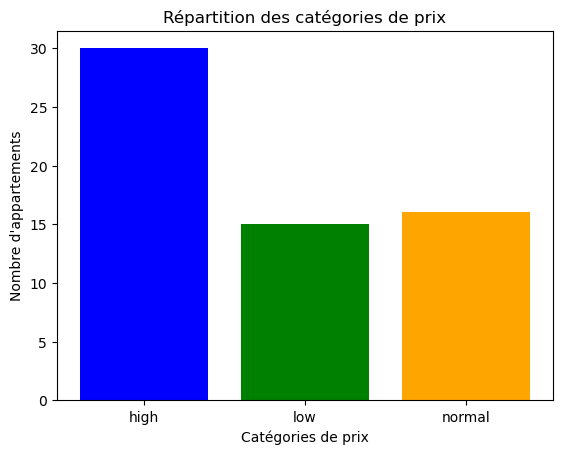

In [3]:
#Avec Matplop:
#Créer un Diagramme à barres pour afficher la répartition des catégories de prix (par exemple, combien d'appartements sont "low", "normal", "high", "scam").


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lire le fichier CSV avec Pandas
df = pd.read_csv('appartements.csv')

# Convertir la colonne 'price_category' en tableau Numpy
prix_categories = np.array(df['price_category'])

# Compter le nombre d'appartements dans chaque catégorie
unique, counts = np.unique(prix_categories, return_counts=True)

# Créer un diagramme à barres
plt.bar(unique, counts, color=['blue', 'green', 'orange', 'red'])

# Ajouter un titre et des labels aux axes
plt.title('Répartition des catégories de prix')
plt.xlabel('Catégories de prix')
plt.ylabel('Nombre d\'appartements')

# Afficher le graphique
plt.show()


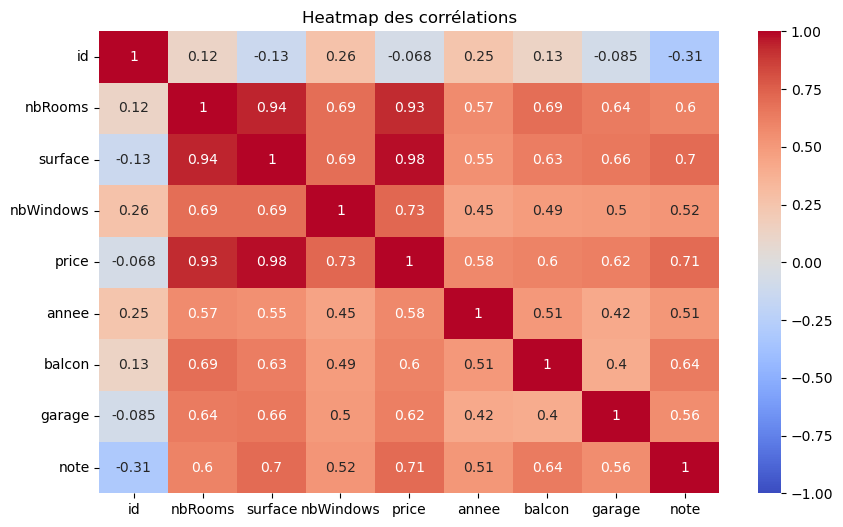

Corrélation entre 'annee' et 'price' : 0.5806715486365538


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lire le fichier CSV
df = pd.read_csv('appartements.csv')

# Calcul de la corrélation entre toutes les colonnes numériques
correlation_matrix = df.corr(numeric_only=True)

# Affichage de la heatmap de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap des corrélations')
plt.show()

# Si vous souhaitez vous concentrer spécifiquement sur la corrélation entre année et prix
print(f"Corrélation entre 'annee' et 'price' : {df['annee'].corr(df['price'])}")


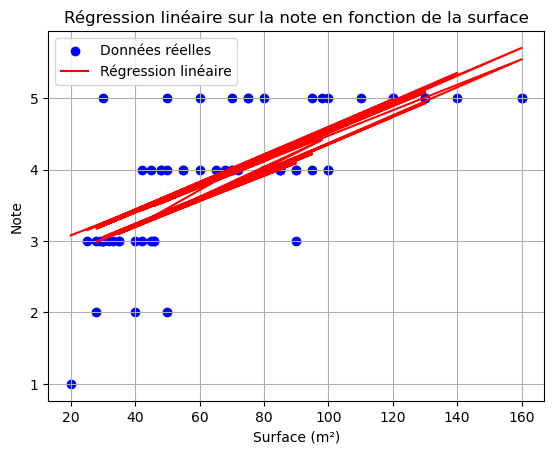

Coefficient : [ 1.47459593e-02  1.07922701e-06  4.20434193e-02  7.57669891e-02
 -1.17810408e-01]
Intercept : 2.600612622845965


In [2]:
#2. Créer une prédiction par regression linéaire sur la note en fonction de la ville, de la surface et du prix

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Charger les données
df = pd.read_csv('appartements.csv')

# Encoder la variable catégorielle 'ville' en utilisant OneHotEncoder
encoder = OneHotEncoder()
encoded_villes = encoder.fit_transform(df[['ville']]).toarray()
encoded_ville_df = pd.DataFrame(encoded_villes, columns=encoder.get_feature_names_out(['ville']))

# Ajouter les colonnes encodées au DataFrame original
df = pd.concat([df, encoded_ville_df], axis=1)

# Définir les variables indépendantes (X) et la variable dépendante (y)
X = df[['surface', 'price'] + list(encoded_ville_df.columns)]  # Inclure surface, price, et les colonnes encodées
y = df['note']

# Créer le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédire sur les mêmes données
y_pred = model.predict(X)

# Visualiser la régression linéaire (relation entre 'surface' et 'note' seulement pour l'affichage)
plt.scatter(df['surface'], y, color='blue', label='Données réelles')
plt.plot(df['surface'], y_pred, color='red', label='Régression linéaire')
plt.title('Régression linéaire sur la note en fonction de la surface')
plt.xlabel('Surface (m²)')
plt.ylabel('Note')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des coefficients de la régression
print("Coefficient :", model.coef_)
print("Intercept :", model.intercept_)


In [3]:
#3. Créer une prédiction par regression linéaire sur l'année en fonction de la ville puis donnéer sa propabilité (R2) et son taux d'erreur en année (RSME ou MSE)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import math

# Charger le dataset
df = pd.read_csv('appartements.csv')

# Encodage OneHot pour la variable catégorielle 'ville'
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df[['ville']]).toarray()

# Créer un DataFrame avec les villes encodées
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['ville']))

# Variable cible (y) : l'année
y = df['annee']  # Assurez-vous que cette colonne 'annee' existe

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le coefficient de détermination R²
r2 = r2_score(y_test, y_pred)

# Calculer l'erreur quadratique moyenne (MSE) et la racine de l'erreur quadratique moyenne (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

# Affichage des résultats
print(f'R² (coefficient de détermination) : {r2}')
print(f'MSE (Erreur Quadratique Moyenne) : {mse}')
print(f'RMSE (Racine de l\'Erreur Quadratique Moyenne) : {rmse}')


R² (coefficient de détermination) : -0.2693063870704899
MSE (Erreur Quadratique Moyenne) : 21.01490692913154
RMSE (Racine de l'Erreur Quadratique Moyenne) : 4.584201885730115


In [8]:
#4. Créer une classification logistique pour savoir si il y a un garage en fonction du prix et de la ville 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

# Charger le dataset
df = pd.read_csv('appartements.csv')

# Vérification pour s'assurer que les colonnes 'price', 'ville', et 'garage' existent
if 'price' in df.columns and 'ville' in df.columns and 'garage' in df.columns:
    
    # Encodage OneHot pour la variable catégorielle 'ville'
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(df[['ville']]).toarray()

    # Créer un DataFrame avec les villes encodées
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['ville']))

    # Ajouter la variable 'price' comme caractéristique dans X
    X_encoded_df['price'] = df['price']

    # Variable cible (y) : présence de garage (1 = garage, 0 = pas de garage)
    y = df['garage']  # Assurez-vous que la colonne 'garage' est binaire (1 ou 0)

    # Séparer les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

    # Initialiser le modèle de régression logistique
    log_reg = LogisticRegression(max_iter=200)

    # Entraîner le modèle
    log_reg.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred = log_reg.predict(X_test)

    # Calcul des métriques : Accuracy, Recall, et F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Affichage des résultats
    print("Régression Logistique - Garage :")
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Affichage du rapport de classification complet
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred))

else:
    print("Le dataset doit contenir les colonnes 'price', 'ville', et 'garage'.")


Régression Logistique - Garage :
Accuracy: 0.7692307692307693
Recall: 0.8333333333333334
F1 Score: 0.7692307692307693
Rapport de classification :
              precision    recall  f1-score   support

       False       0.83      0.71      0.77         7
        True       0.71      0.83      0.77         6

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



In [9]:
#5. Créer une classification par KNN pour savoir si il a un balcon en fonction du prix et de la ville

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

# Charger le dataset
df = pd.read_csv('appartements.csv')

# Vérification pour s'assurer que les colonnes 'price', 'ville', et 'balcon' existent
if 'price' in df.columns and 'ville' in df.columns and 'balcon' in df.columns:
    
    # Encodage OneHot pour la variable catégorielle 'ville'
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(df[['ville']]).toarray()

    # Créer un DataFrame avec les villes encodées
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['ville']))

    # Ajouter la variable 'price' comme caractéristique dans X
    X_encoded_df['price'] = df['price']

    # Variable cible (y) : présence de balcon (1 = balcon, 0 = pas de balcon)
    y = df['balcon']  # Assurez-vous que la colonne 'balcon' est binaire (1 ou 0)

    # Séparer les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

    # Initialiser le modèle KNN avec un certain nombre de voisins (k = 5 ici)
    knn = KNeighborsClassifier(n_neighbors=5)

    # Entraîner le modèle
    knn.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred = knn.predict(X_test)

    # Calcul des métriques : Accuracy, Recall, et F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Affichage des résultats
    print("KNN - Balcon :")
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Affichage du rapport de classification complet
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred))

else:
    print("Le dataset doit contenir les colonnes 'price', 'ville', et 'balcon'.")


KNN - Balcon :
Accuracy: 0.8461538461538461
Recall: 0.8
F1 Score: 0.8888888888888888
Rapport de classification :
              precision    recall  f1-score   support

       False       0.60      1.00      0.75         3
        True       1.00      0.80      0.89        10

    accuracy                           0.85        13
   macro avg       0.80      0.90      0.82        13
weighted avg       0.91      0.85      0.86        13



In [1]:
#7.  Bonus: Comparer les 2 méthodes de classification KNN et logistique précédente pour voir celle qui prédits le mieux: (accuracy, recall puis F1 Score)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

# Charger le dataset
df = pd.read_csv('appartements.csv')

# Vérification pour s'assurer que les colonnes nécessaires existent
if all(col in df.columns for col in ['price', 'ville', 'garage', 'balcon']):
    
    ### Classification Logistique - Prédiction Garage
    # Encodage OneHot pour la variable catégorielle 'ville'
    encoder = OneHotEncoder()
    X_encoded_garage = encoder.fit_transform(df[['ville']]).toarray()
    X_encoded_garage_df = pd.DataFrame(X_encoded_garage, columns=encoder.get_feature_names_out(['ville']))

    # Ajout de la variable 'price' comme caractéristique dans X
    X_encoded_garage_df['price'] = df['price']

    # Variable cible (y) : présence de garage (1 = garage, 0 = pas de garage)
    y_garage = df['garage']

    # Séparer les données en ensembles d'entraînement et de test
    X_train_garage, X_test_garage, y_train_garage, y_test_garage = train_test_split(
        X_encoded_garage_df, y_garage, test_size=0.2, random_state=42)

    # Initialiser et entraîner le modèle de régression logistique
    log_reg = LogisticRegression(max_iter=200)
    log_reg.fit(X_train_garage, y_train_garage)
    y_pred_garage = log_reg.predict(X_test_garage)

    # Calcul des métriques pour la régression logistique
    accuracy_garage = accuracy_score(y_test_garage, y_pred_garage)
    recall_garage = recall_score(y_test_garage, y_pred_garage)
    f1_garage = f1_score(y_test_garage, y_pred_garage)

    print("Résultats - Régression Logistique (Garage) :")
    print(f"Accuracy : {accuracy_garage:.4f}")
    print(f"Recall   : {recall_garage:.4f}")
    print(f"F1 Score : {f1_garage:.4f}")
    print()

    ### Classification KNN - Prédiction Balcon
    # Encodage OneHot pour la variable catégorielle 'ville'
    X_encoded_balcon = encoder.fit_transform(df[['ville']]).toarray()
    X_encoded_balcon_df = pd.DataFrame(X_encoded_balcon, columns=encoder.get_feature_names_out(['ville']))

    # Ajout de la variable 'price' comme caractéristique dans X
    X_encoded_balcon_df['price'] = df['price']

    # Variable cible (y) : présence de balcon (1 = balcon, 0 = pas de balcon)
    y_balcon = df['balcon']

    # Séparer les données en ensembles d'entraînement et de test
    X_train_balcon, X_test_balcon, y_train_balcon, y_test_balcon = train_test_split(
        X_encoded_balcon_df, y_balcon, test_size=0.2, random_state=42)

    # Initialiser et entraîner le modèle KNN (nombre de voisins k = 5)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_balcon, y_train_balcon)
    y_pred_balcon = knn.predict(X_test_balcon)

    # Calcul des métriques pour KNN
    accuracy_balcon = accuracy_score(y_test_balcon, y_pred_balcon)
    recall_balcon = recall_score(y_test_balcon, y_pred_balcon)
    f1_balcon = f1_score(y_test_balcon, y_pred_balcon)

    print("Résultats - KNN (Balcon) :")
    print(f"Accuracy : {accuracy_balcon:.4f}")
    print(f"Recall   : {recall_balcon:.4f}")
    print(f"F1 Score : {f1_balcon:.4f}")
    print()

    ### Comparaison
    print("### Comparaison des deux modèles ###")
    print(f"{'Métrique':<10}{'Régression Logistique (Garage)':<30}{'   KNN (Balcon)':<30}")
    print(f"{'Accuracy':<10}{accuracy_garage:<30}{accuracy_balcon:<30}")
    print(f"{'Recall':<10}{recall_garage:<30}{recall_balcon:<30}")
    print(f"{'F1 Score':<10}{f1_garage:<30}{f1_balcon:<30}")

else:
    print("Le dataset doit contenir les colonnes 'price', 'ville', 'garage', et 'balcon'.")


Résultats - Régression Logistique (Garage) :
Accuracy : 0.7692
Recall   : 0.8333
F1 Score : 0.7692

Résultats - KNN (Balcon) :
Accuracy : 0.8462
Recall   : 0.8000
F1 Score : 0.8889

### Comparaison des deux modèles ###
Métrique  Régression Logistique (Garage)   KNN (Balcon)               
Accuracy  0.7692307692307693            0.8461538461538461            
Recall    0.8333333333333334            0.8                           
F1 Score  0.7692307692307693            0.8888888888888888            


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Charger le dataset
df = pd.read_csv('appartements.csv')

# 2. Prétraitement des données
# Sélection des colonnes utiles : price, ville (catégorielle) et balcon (cible)
df['balcon'] = df['balcon'].astype(int)  # Convertir la colonne balcon en valeurs 0/1 (True/False)
df['ville'] = LabelEncoder().fit_transform(df['ville'])  # Encoder la ville en valeurs numériques

# Variables explicatives (features) : prix et ville
X = df[['price', 'ville']]

# Cible (target) : balcon
y = df['balcon']

# 3. Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# 6. Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 78.95%
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.67      0.80        12

    accuracy                           0.79        19
   macro avg       0.82      0.83      0.79        19
weighted avg       0.87      0.79      0.79        19

Confusion Matrix:
[[7 0]
 [4 8]]
